### Сегментация клиентов в Python 
 
### RFM-анализ

**Скачайте датасет и проведите RFM анализ. В каждом подсегменте поделите пользователей на 4 класса (как на занятии). Отсчитывайте количество дней, прошедших с момента последней покупки, с максимальной даты покупки в датасете.**

 Вопросы:

 - Какое максимальное кол-во покупок было совершено одним пользователем?
 - Какая верхняя граница у суммы покупок у пользователей с классом 4 в подсегменте М? (Другими словами: пользователи, у которых сумма покупок от 0 до Х попадают в 4 класс в подсегменте М)
 - Какая нижняя граница у количества покупок у пользователей с классом 1 в подсегменте F?
 - Какая верхняя граница у количества покупок у пользователей с классом 2 в подсегменте R?
 - Сколько пользователей попало в сегмент 111?
 - Сколько пользователей попало в сегмент 311?
 - В каком RFM-сегменте самое большое кол-во пользователей?
 - В каком RFM-сегменте самое маленькое кол-во пользователей?
 - Какое количество пользователей попало в самый малочисленный сегмент?

In [2]:
# Lib imports

import pandas as pd
import numpy as np


# Matplotlib forms basis for visualization in Python
import matplotlib.pyplot as plt

# We will use the Seaborn library
import seaborn as sns
sns.set()

# Graphics in SVG format are more sharp and legible
get_ipython().run_line_magic('config', "InlineBackend.figure_format = 'svg'")

# Increase the default plot size and set the color scheme
plt.rcParams['figure.figsize'] = (8, 5)
plt.rcParams['image.cmap'] = 'viridis'

In [3]:
# Upload dataset

orders = pd.read_csv('RFM_ht_data.csv', sep=',', error_bad_lines=False)

C:\Users\repin\AppData\Local\Temp\ipykernel_14512\783212622.py:3: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  orders = pd.read_csv('RFM_ht_data.csv', sep=',', error_bad_lines=False)
C:\Users\repin\AppData\Local\Temp\ipykernel_14512\783212622.py:3: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  orders = pd.read_csv('RFM_ht_data.csv', sep=',', error_bad_lines=False)


In [7]:
orders.head()

,InvoiceNo,CustomerCode,InvoiceDate,Amount
0,C0011810010001,19067290,2020-09-01,1716.00
1,C0011810010017,13233933,2020-09-01,1489.74
2,C0011810010020,99057968,2020-09-01,151.47
3,C0011810010021,80007276,2020-09-01,146.72
4,C0011810010024,13164076,2020-09-01,104.00


In [4]:
# Check dataframe

orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332730 entries, 0 to 332729
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   InvoiceNo     332730 non-null  object 
 1   CustomerCode  332730 non-null  object 
 2   InvoiceDate   332730 non-null  object 
 3   Amount        332730 non-null  float64
dtypes: float64(1), object(3)
memory usage: 10.2+ MB


In [5]:
# Convert CustomerCode and InvoiceNo to str type and InvoiceDate to datetime

orders.CustomerCode = orders.CustomerCode.apply(str)
orders.InvoiceNo = orders.InvoiceNo.apply(str)
orders.InvoiceDate = pd.to_datetime(orders['InvoiceDate'])

In [8]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332730 entries, 0 to 332729
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   InvoiceNo     332730 non-null  object        
 1   CustomerCode  332730 non-null  object        
 2   InvoiceDate   332730 non-null  datetime64[ns]
 3   Amount        332730 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 10.2+ MB


In [9]:
# Check DF for duplicates and drop them if they exist

orders.drop_duplicates()

,InvoiceNo,CustomerCode,InvoiceDate,Amount
0,C0011810010001,19067290,2020-09-01,1716.00
1,C0011810010017,13233933,2020-09-01,1489.74
2,C0011810010020,99057968,2020-09-01,151.47
3,C0011810010021,80007276,2020-09-01,146.72
4,C0011810010024,13164076,2020-09-01,104.00
...,...,...,...,...
332725,S0081810310459,14092500,2020-09-30,3801.87
332726,S0081810310461,99065678,2020-09-30,5769.88
332727,S0081810310462,19029918,2020-09-30,736.88
332728,S0081810310463,13020033,2020-09-30,1475.20


In [5]:
orders

,InvoiceNo,CustomerCode,InvoiceDate,Amount
0,C0011810010001,19067290,2020-09-01,1716.00
1,C0011810010017,13233933,2020-09-01,1489.74
2,C0011810010020,99057968,2020-09-01,151.47
3,C0011810010021,80007276,2020-09-01,146.72
4,C0011810010024,13164076,2020-09-01,104.00
...,...,...,...,...
332725,S0081810310459,14092500,2020-09-30,3801.87
332726,S0081810310461,99065678,2020-09-30,5769.88
332727,S0081810310462,19029918,2020-09-30,736.88
332728,S0081810310463,13020033,2020-09-30,1475.20


**Задание №1**

**Какое максимальное кол-во покупок было совершено одним пользователем?**

In [15]:
orders.query('Amount > 0').groupby('CustomerCode').agg({'InvoiceNo':'count'}).sort_values('InvoiceNo', ascending=False)

,InvoiceNo
CustomerCode,
19057820,204
13215452,113
13032521,106
19080880,99
99003061,90
...,...
13272875,1
13272878,1
13272882,1


**Ответ на задание 1:** максимальное количество покупок, совершенное одним пользователем составляет 204

**Задание №2**

**Какая верхняя граница у суммы покупок у пользователей с классом 4 в подсегменте М? (Другими словами: пользователи, у которых сумма покупок от 0 до Х попадают в 4 класс в подсегменте М)**

In [10]:
# Finding rightside time border 

last_date = orders.InvoiceDate.max()

In [11]:
# Prepare date for RFM-analysis

rfmTable = orders.groupby('CustomerCode').agg({'InvoiceDate': lambda x: (last_date - x.max()).days, # Recency #Количество дней с последнего заказа
                                        'InvoiceNo': lambda x: len(x),      # Frequency #Количество заказов
                                        'Amount': lambda x: x.sum() }) # Monetary Value #Общая сумма по всем заказам

rfmTable['InvoiceDate'] = rfmTable['InvoiceDate'].astype(int)
rfmTable.rename(columns={'InvoiceDate': 'recency', 
                         'InvoiceNo': 'frequency', 
                         'Amount': 'monetary_value'}, inplace=True)


In [12]:
rfmTable

,recency,frequency,monetary_value
CustomerCode,,,
02213019,19,1,1609.20
02213042,22,3,9685.48
02213071,29,1,415.00
02213088,23,1,305.00
02213092,25,1,1412.88
...,...,...,...
99099927,10,1,961.10
99099936,0,1,1521.78
99099959,8,2,1444.56


In [13]:
# Finding quantiles for recency, frequency, monetary_value

quantiles = rfmTable.quantile(q=[0.25, 0.5, 0.75])
quantiles

,recency,frequency,monetary_value
0.25,2.0,1.0,765.00
0.50,8.0,2.0,1834.48
0.75,16.0,3.0,4008.84


**Ответ на задание 2:** 765 рублей

**Задание №3**

**Какая нижняя граница у количества покупок у пользователей с классом 1 в подсегменте F?**


**Ответ на задание №3:**  4 покупки 

**Задание №4**

**Какое максимальное количество дней может пройти с момента последней покупки для того, чтобы пользователь попал в класс 2 в подсегменте R?**

**Ответ на задание №4:**  8 дней 

**Задание №5**

**Сколько пользователей попало в сегмент 111?**

In [22]:
# Custom functions for dividing of customers on RFM-groups

def RClass(value,parameter_name,quantiles_table):
    if value <= quantiles_table[parameter_name][0.25]:
        return 1
    elif value <= quantiles_table[parameter_name][0.50]:
        return 2
    elif value <= quantiles_table[parameter_name][0.75]: 
        return 3
    else:
        return 4


def FMClass(value, parameter_name,quantiles_table):
    if value <= quantiles_table[parameter_name][0.25]:
        return 4
    elif value <= quantiles_table[parameter_name][0.50]:
        return 3
    elif value <= quantiles_table[parameter_name][0.75]: 
        return 2
    else:
        return 1


In [23]:
# Using of custom functions to determine RFM-groups

rfmSegmentation = rfmTable

rfmSegmentation['R_Quartile'] = rfmSegmentation['recency'].apply(RClass, args=('recency',quantiles))

rfmSegmentation['F_Quartile'] = rfmSegmentation['frequency'].apply(FMClass, args=('frequency',quantiles))

rfmSegmentation['M_Quartile'] = rfmSegmentation['monetary_value'].apply(FMClass, args=('monetary_value',quantiles))

rfmSegmentation['RFMClass'] = rfmSegmentation.R_Quartile.map(str)\
                              + rfmSegmentation.F_Quartile.map(str)\
                              + rfmSegmentation.M_Quartile.map(str)
        

In [24]:
# Result of RFM-segmentation

rfmSegmentation

,recency,frequency,monetary_value,R_Quartile,F_Quartile,M_Quartile,RFMClass
CustomerCode,,,,,,,
02213019,19,1,1609.20,4,4,3,443
02213042,22,3,9685.48,4,2,1,421
02213071,29,1,415.00,4,4,4,444
02213088,23,1,305.00,4,4,4,444
02213092,25,1,1412.88,4,4,3,443
...,...,...,...,...,...,...,...
99099927,10,1,961.10,3,4,3,343
99099936,0,1,1521.78,1,4,3,143
99099959,8,2,1444.56,2,3,3,233


In [25]:
rfmSegmentation.info()

<class 'pandas.core.frame.DataFrame'>
Index: 123733 entries, 02213019 to 99099972
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   recency         123733 non-null  int32  
 1   frequency       123733 non-null  int64  
 2   monetary_value  123733 non-null  float64
 3   R_Quartile      123733 non-null  int64  
 4   F_Quartile      123733 non-null  int64  
 5   M_Quartile      123733 non-null  int64  
 6   RFMClass        123733 non-null  object 
dtypes: float64(1), int32(1), int64(4), object(1)
memory usage: 7.1+ MB


In [40]:
# Grouping by RFM-segments

quantity = rfmSegmentation.groupby('RFMClass', as_index=False)\
                          .agg({'frequency':'count'})\
                          .rename(columns={'frequency':'quantity'})
quantity

,RFMClass,quantity
0,111,9705
1,112,3602
2,113,1066
3,114,60
4,121,1527
...,...,...
59,434,998
60,441,1642
61,442,4106
62,443,6729


**Ответ на задание 5:** в сегменте 111 количество пользователей составляет 9705

**Задание №6**

**Сколько пользователей попало в сегмент 311?**

In [36]:
quantity.loc[quantity['RFMClass'] == '311']

,RFMClass,quantity
32,311,1609


**Ответ на задание 6:** в сегменте 311 количество пользователей составляет 1609

**Задание №7**

**В каком RFM-сегменте самое большое кол-во пользователей?**

In [41]:
quantity.sort_values('quantity',ascending=False)        

,RFMClass,quantity
63,444,10624
0,111,9705
62,443,6729
47,344,6593
16,211,5847
...,...,...
55,424,63
19,214,60
3,114,60
35,314,33


**Ответ на задание 7:** самое большое количество пользователей в RFM-сегменте 444

**Задание №8**

**В каком RFM-сегменте самое маленькое кол-во пользователей?**

In [42]:
quantity.sort_values('quantity',ascending=True)  

,RFMClass,quantity
51,414,2
35,314,33
3,114,60
19,214,60
55,424,63
...,...,...
16,211,5847
47,344,6593
62,443,6729
0,111,9705


**Ответ на задание 8:** самое маленькое количество пользователей в RFM-сегменте 414

**Задание №9**

**Какое количество пользователей попало в самый малочисленный сегмент?**

**Ответ на задание 9:** в самом малочисленном RFM-сегменте 2 пользователя 

In [47]:
# RF-table

pd.crosstab(index = rfmSegmentation.R_Quartile, columns = rfmSegmentation.F_Quartile)

F_Quartile,1,2,3,4
R_Quartile,,,,
1,14433,4671,5795,6074
2,9634,5889,8633,10399
3,3091,3748,7734,13263
4,542,1311,5415,23101


In [43]:
# RM-table

pd.crosstab(index = rfmSegmentation.R_Quartile, columns = rfmSegmentation.M_Quartile)

M_Quartile,1,2,3,4
R_Quartile,,,,
1,12598,7968,5944,4463
2,10189,9468,8213,6685
3,4863,7007,7845,8121
4,3283,6490,8909,11687


In [44]:
# FM-table

pd.crosstab(index = rfmSegmentation.F_Quartile, columns = rfmSegmentation.M_Quartile)

M_Quartile,1,2,3,4
F_Quartile,,,,
1,17415,7714,2416,155
2,5176,5746,3946,751
3,5089,8667,9120,4701
4,3253,8806,15429,25349


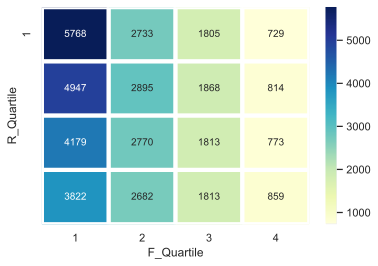

In [45]:
# Heatmap for RF-table

rfm_table = rfmSegmentation.pivot_table(
                        index='R_Quartile', 
                        columns='F_Quartile', 
                        values='monetary_value', 
                        aggfunc=np.median).applymap(int)
sns.heatmap(rfm_table, cmap="YlGnBu", annot=True, fmt=".0f", linewidths=4.15, annot_kws={"size": 10},yticklabels=4);